In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Processing

In [3]:
data1 = pd.read_parquet('/kaggle/input/scholawrite/all_sorted-00000-of-00002.parquet', engine='pyarrow')
data2 = pd.read_parquet('/kaggle/input/scholawrite/all_sorted-00001-of-00002.parquet', engine='pyarrow')

In [4]:
df = pd.concat([data1, data2], axis=0, ignore_index=True)
df.head()

,project,timestamp,author,before text,after text,label,high-level
0,1,1700506686410,0,% Author 1 \\ {\bf Author 2} \\ ... \\...,% Author 1 \\ {\bf Author 2} \\ ... \\...,Linguistic Style,REVISION
1,1,1700517579571,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Coherence,REVISION
2,1,1700517580041,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Text Production,IMPLEMENTATION
3,1,1700517582596,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Text Production,IMPLEMENTATION
4,1,1700517583059,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Text Production,IMPLEMENTATION


In [5]:
project_tables = {project: group for project, group in df.groupby('project')}
for project, table in project_tables.items():
    project_tables[project] = table.sort_values(by='timestamp', ascending=True)
project_tables[1].head()

,project,timestamp,author,before text,after text,label,high-level
0,1,1700506686410,0,% Author 1 \\ {\bf Author 2} \\ ... \\...,% Author 1 \\ {\bf Author 2} \\ ... \\...,Linguistic Style,REVISION
1,1,1700517579571,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Coherence,REVISION
2,1,1700517580041,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Text Production,IMPLEMENTATION
3,1,1700517582596,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Text Production,IMPLEMENTATION
4,1,1700517583059,0,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,%\setlength\titlebox{<dim>}\n%\n% and set <dim...,Text Production,IMPLEMENTATION


In [6]:
exp_data = pd.read_csv("/kaggle/input/experiment-data/model_outputs (1).csv")
exp_data.head()

,before text,after text,label,model,index_in_file
0,\documentclass{article}\n\usepackage{graphicx}...,Your response should be limited to 2000 word t...,Text Production,llama-sw-data-reference,0
1,Your response should be limited to 2000 word t...,Your response should be limited to 2000 word t...,Text Production,llama-sw-data-reference,1
2,Your response should be limited to 2000 word t...,Your response should be limited to 2000 word t...,Section Planning,llama-sw-data-reference,2
3,Your response should be limited to 2000 word t...,Your response should be limited to 2000 word t...,Section Planning,llama-sw-data-reference,3
4,Your response should be limited to 2000 word t...,Your response should be limited to 2000 word t...,Text Production,llama-sw-data-reference,4


In [7]:
model_tables = {}

for model_name, group_df in exp_data.groupby('model'):
    sorted_df = group_df.sort_values(by='index_in_file').reset_index(drop=True)
    model_tables[model_name] = sorted_df

for model_name, df in model_tables.items():
    print(f"Model: {model_name}")

Model: gpt-4-turbo
Model: gpt-4-turbo-data-reference
Model: gpt-4o
Model: gpt-4o-data-reference
Model: gpt-o1-mini
Model: gpt-o1-mini-data-reference
Model: llama-meta
Model: llama-sw
Model: llama-sw-data-reference


# Human Behaviorial Pattern Mining
## LCS Analysis
### Elementary Continuous Intention Analysis

In [9]:
def longest_contiguous_label_run_np(label_series):
    arr = np.array(label_series)
    change_points = np.where(arr[1:] != arr[:-1])[0] + 1
    change_points = np.concatenate(([0], change_points, [len(arr)]))
    run_lengths = np.diff(change_points)
    run_labels = arr[change_points[:-1]]
    max_idx = np.argmax(run_lengths)
    return run_labels[max_idx], run_lengths[max_idx]

In [10]:
for i in range(1, 6):
    table = project_tables[i]
    
    label_series = table['label']
    
    longest_label, length = longest_contiguous_label_run_np(label_series)
    print(f"longest label: {longest_label}; longest sequence length: {length}")

longest label: Text Production; longest sequence length: 289
longest label: Clarity; longest sequence length: 126
longest label: Text Production; longest sequence length: 284
longest label: Text Production; longest sequence length: 148
longest label: Object Insertion; longest sequence length: 233


In [10]:
for model_name, df in model_tables.items():
    labels = df['label']
    longest_label, length = longest_contiguous_label_run_np(labels)
    print(f"{model_name}: longest label: {longest_label}; longest sequence length: {length}")

gpt-4-turbo: longest label: Citation Integration; longest sequence length: 10
gpt-4-turbo-data-reference: longest label: Cross-reference; longest sequence length: 8
gpt-4o: longest label: Cross-reference; longest sequence length: 25
gpt-4o-data-reference: longest label: Cross-reference; longest sequence length: 24
gpt-o1-mini: longest label: Coherence; longest sequence length: 57
gpt-o1-mini-data-reference: longest label: Section Planning; longest sequence length: 6
llama-meta: longest label: Structural; longest sequence length: 5
llama-sw: longest label: Text Production; longest sequence length: 8
llama-sw-data-reference: longest label: Text Production; longest sequence length: 8


### Sliding Window

In [11]:
from collections import Counter

def most_common_subsequence(label_series, window_size=50):
    sequence_list = list(label_series)
    n = len(sequence_list)
    
    if n < window_size:
        return None, 0

    subsequences = [tuple(sequence_list[i:i+window_size]) for i in range(n - window_size + 1)]

    counter = Counter(subsequences)
    most_common_seq, freq = counter.most_common(1)[0]
    
    return most_common_seq, freq

In [40]:
for i in range(1, 6):
    table = project_tables[i]
    
    label_series = table['label']
    
    longest_label, length = most_common_subsequence(label_series)
    print(f"longest common subsequence: {longest_label}; longest frequency length: {length}")

longest common subsequence: ('Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production'); longest frequency le

### Sliding Window(diff-val constraint version)

In [24]:
def most_frequent_contiguous_subsequence_with_constraint(label_sequence, window_size=3, min_support=3, diff_constraint=1):
    n = len(label_sequence)
    if n < window_size:
        return None, 0
    windows = [
        tuple(label_sequence[i:i+window_size])
        for i in range(n - window_size + 1)
        if len(set(label_sequence[i:i+window_size])) > diff_constraint
    ]

    counter = Counter(windows)
    counter = {k: v for k, v in counter.items() if v >= min_support}

    if not counter:
        return None, 0

    most_common = max(counter.items(), key=lambda x: (x[1], len(x[0])))
    return most_common

#### Human Behaviorial Data

Project 1
- differ_val=0: longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 8655)
- differ_val=1: longest common subsequence: (('Coherence', 'Text Production', 'Text Production'), 67)
- differ_val=2: longest common subsequence: (('Clarity', 'Coherence', 'Text Production'), 7)
- differ_val=3: longest common subsequence: (None, 0)

In [13]:
for i in range(1, 6):
    table = project_tables[i]
    
    label_series = table['label']
    
    longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series, 3, 3, 0)
    print(f"longest common subsequence: {longest_label}")

longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 8655)
longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 2094)
longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 4840)
longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 4110)
longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 12215)


In [51]:
for i in range(1, 6):
    table = project_tables[i]
    
    label_series = table['label']
    
    longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series)
    print(f"longest common subsequence: {longest_label}")

longest common subsequence: (('Coherence', 'Text Production', 'Text Production'), 67)
longest common subsequence: (('Coherence', 'Text Production', 'Text Production'), 31)
longest common subsequence: (('Text Production', 'Text Production', 'Coherence'), 28)
longest common subsequence: (('Text Production', 'Text Production', 'Clarity'), 51)
longest common subsequence: (('Clarity', 'Text Production', 'Text Production'), 176)


In [52]:
for i in range(1, 6):
    table = project_tables[i]
    
    label_series = table['label']
    
    longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series, 3, 3, 2)
    print(f"longest common subsequence: {longest_label}")

longest common subsequence: (('Clarity', 'Coherence', 'Text Production'), 7)
longest common subsequence: (('Structural', 'Coherence', 'Text Production'), 5)
longest common subsequence: (('Clarity', 'Coherence', 'Text Production'), 5)
longest common subsequence: (('Text Production', 'Coherence', 'Clarity'), 5)
longest common subsequence: (('Text Production', 'Coherence', 'Clarity'), 10)


In [14]:
for i in range(1, 6):
    table = project_tables[i]
    
    label_series = table['label']
    
    longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series, 3, 3, 3)
    print(f"longest common subsequence: {longest_label}")

longest common subsequence: (None, 0)
longest common subsequence: (None, 0)
longest common subsequence: (None, 0)
longest common subsequence: (None, 0)
longest common subsequence: (None, 0)


#### LLM Behaviorial Data

In [19]:
!pip install ace_tools

In [29]:
results = []

for model_name, df in model_tables.items():
    labels = df['label'].tolist()
    for diff_val in range(3):
        longest_label = most_frequent_contiguous_subsequence_with_constraint(labels, 3, 3, diff_val)
        results.append({
            "model": model_name,
            "diff_val": diff_val,
            "longest_subsequence": longest_label
        })

results_df = pd.DataFrame(results)
results_df

,model,diff_val,longest_subsequence
0,gpt-4-turbo,0,"((Citation Integration, Citation Integration, ..."
1,gpt-4-turbo,1,"((Citation Integration, Scientific Accuracy, C..."
2,gpt-4-turbo,2,"(None, 0)"
3,gpt-4-turbo-data-reference,0,"((Citation Integration, Citation Integration, ..."
4,gpt-4-turbo-data-reference,1,"((Coherence, Citation Integration, Citation In..."
5,gpt-4-turbo-data-reference,2,"(None, 0)"
6,gpt-4o,0,"((Cross-reference, Cross-reference, Cross-refe..."
7,gpt-4o,1,"((Citation Integration, Citation Integration, ..."
8,gpt-4o,2,"(None, 0)"
9,gpt-4o-data-reference,0,"((Cross-reference, Cross-reference, Cross-refe..."


In [30]:
def clean_subsequence(value):
    if isinstance(value, tuple) and isinstance(value[0], (list, tuple)):
        return ", ".join(value[0])
    return ""

def extract_frequency(value):
    if isinstance(value, tuple) and isinstance(value[1], int):
        return value[1]
    return 0

results_df["cleaned_subsequence"] = results_df["longest_subsequence"].apply(clean_subsequence)
results_df["frequency"] = results_df["longest_subsequence"].apply(extract_frequency)

In [31]:
results_df.drop(columns=["longest_subsequence"], inplace=True)
results_df.rename(columns={"cleaned_subsequence": "longest_subsequence"}, inplace=True)

In [32]:
results_df

,model,diff_val,longest_subsequence,frequency
0,gpt-4-turbo,0,"Citation Integration, Citation Integration, Ci...",36
1,gpt-4-turbo,1,"Citation Integration, Scientific Accuracy, Cit...",3
2,gpt-4-turbo,2,,0
3,gpt-4-turbo-data-reference,0,"Citation Integration, Citation Integration, Ci...",18
4,gpt-4-turbo-data-reference,1,"Coherence, Citation Integration, Citation Inte...",4
5,gpt-4-turbo-data-reference,2,,0
6,gpt-4o,0,"Cross-reference, Cross-reference, Cross-reference",38
7,gpt-4o,1,"Citation Integration, Citation Integration, Cr...",7
8,gpt-4o,2,,0
9,gpt-4o-data-reference,0,"Cross-reference, Cross-reference, Cross-reference",54


In [33]:
output_path = "/kaggle/working/final_subsequence_results.csv"
results_df.to_csv(output_path, index=False)

## Hidden Markov Models

In [8]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.4 MB/s eta 0:00:0000:01


In [9]:
import hmmlearn
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

In [10]:
project_tables[1]['label']

0        Linguistic Style
1               Coherence
2         Text Production
3         Text Production
4         Text Production
               ...       
14212     Text Production
14213     Text Production
14214           Coherence
14215           Coherence
14216           Coherence
Name: label, Length: 14217, dtype: object

In [11]:
def hmm_modeling(labels):
    le = LabelEncoder()
    encoded_obs = le.fit_transform(labels).reshape(-1, 1)
    
    n_unique_obs = len(le.classes_)
    max_states = 10
    
    bics = []
    models = []
    
    for n in range(2, max_states + 1):
        model = hmm.MultinomialHMM(n_components=n, n_iter=100, random_state=42)
        model.fit(encoded_obs)
    
        logL = model.score(encoded_obs)
    
        p = (n - 1) + n * (n - 1) + n * (n_unique_obs - 1)
        bic = -2 * logL + p * np.log(len(encoded_obs))
    
        bics.append(bic)
        models.append(model)
    
    optimal_n = np.argmin(bics) + 2
    best_model = models[optimal_n - 2]
    
    print(f"Optimal number of hidden states (BIC): {optimal_n}")

    logprob, hidden_states = best_model.decode(encoded_obs)
    
    plt.plot(range(2, max_states + 1), bics, marker='o')
    plt.xlabel("Number of hidden states")
    plt.ylabel("BIC")
    plt.title("Model selection using BIC")
    plt.grid(True)
    plt.show()
    
    return {
        'best_model': best_model,
        'optimal_n': optimal_n,
        'label_encoder': le,
        'encoded_obs': encoded_obs,
        'hidden_states': hidden_states,
        'bics': bics
    }

Optimal number of hidden states (BIC): 2


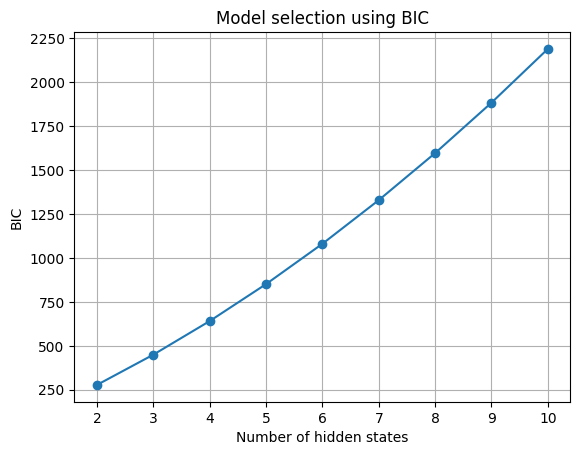

In [12]:
results = hmm_modeling(project_tables[1]['label'])

Optimal number of hidden states (BIC): 2


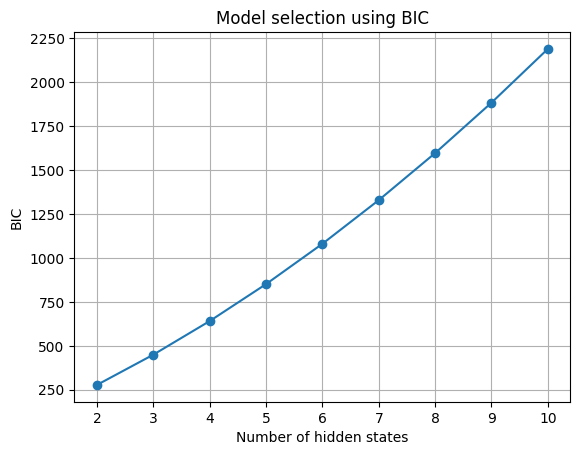

Optimal number of hidden states (BIC): 2


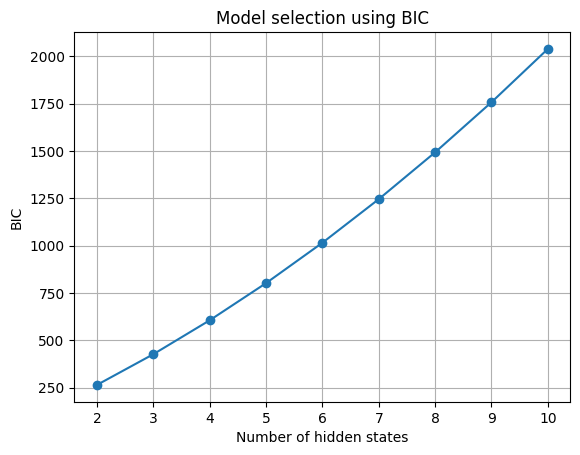

Optimal number of hidden states (BIC): 2


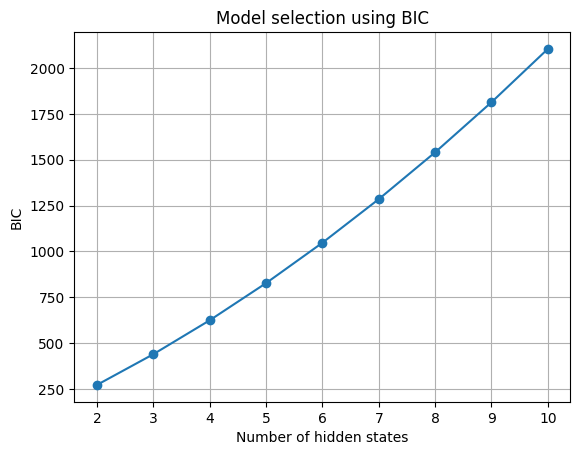

Optimal number of hidden states (BIC): 2


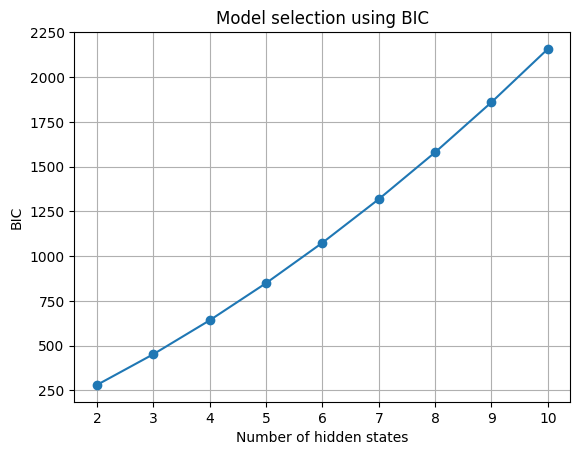

Optimal number of hidden states (BIC): 2


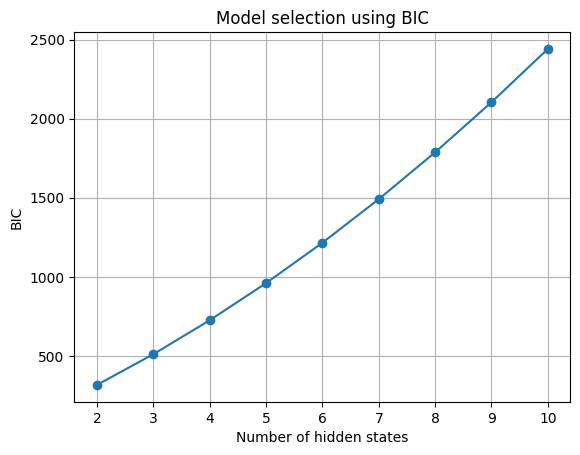

In [13]:
results = []
for i in range(1, 6):
    result = hmm_modeling(project_tables[i]['label'])
    results.append(result)

In [14]:
for i, result in enumerate(results, start=1):
    model = result['best_model']
    transmat = model.transmat_
    print(f"\n===== Model {i}: Transition Matrix (n_components = {result['optimal_n']}) =====")
    print(np.round(transmat, 3))


===== Model 1: Transition Matrix (n_components = 2) =====
[[0.878 0.122]
 [0.999 0.001]]

===== Model 2: Transition Matrix (n_components = 2) =====
[[0.878 0.122]
 [0.999 0.001]]

===== Model 3: Transition Matrix (n_components = 2) =====
[[0.878 0.122]
 [0.999 0.001]]

===== Model 4: Transition Matrix (n_components = 2) =====
[[0.878 0.122]
 [0.999 0.001]]

===== Model 5: Transition Matrix (n_components = 2) =====
[[0.878 0.122]
 [0.999 0.001]]


In [15]:
from collections import Counter, defaultdict

def dominant_label_transition(result, label_series):
    model = result['best_model']
    hidden_states = result['hidden_states']
    transmat = model.transmat_
    n_states = result['optimal_n']
    
    dominant_labels = {}
    for s in range(n_states):
        indices = np.where(hidden_states == s)[0]
        most_common = Counter(label_series.iloc[indices]).most_common(1)[0][0]
        dominant_labels[s] = most_common

    label_transitions = defaultdict(float)
    for i in range(n_states):
        for j in range(n_states):
            li = dominant_labels[i]
            lj = dominant_labels[j]
            label_transitions[(li, lj)] += transmat[i, j]

    print("Dominant Label Transitions:")
    for (from_label, to_label), prob in label_transitions.items():
        if prob > 0.05:  
            print(f"{from_label} → {to_label}: {prob:.3f}")

# Markov Chain Analysis
## First-order Markov Chain Construction
### Human Behaviors

In [16]:
def build_label_transition_matrix(labels):
    transitions = defaultdict(lambda: defaultdict(int))
    
    for i in range(len(labels) - 1):
        from_label = labels.iloc[i]
        to_label = labels.iloc[i + 1]
        transitions[from_label][to_label] += 1

    transition_df = pd.DataFrame(transitions).fillna(0).T
    transition_df = transition_df.div(transition_df.sum(axis=1), axis=0)

    return transition_df

In [17]:
transmit_matrices = []
for i in range(1, 6):
    df = build_label_transition_matrix(project_tables[i]['label'])
    transmit_matrices.append(df)
    # print(df)

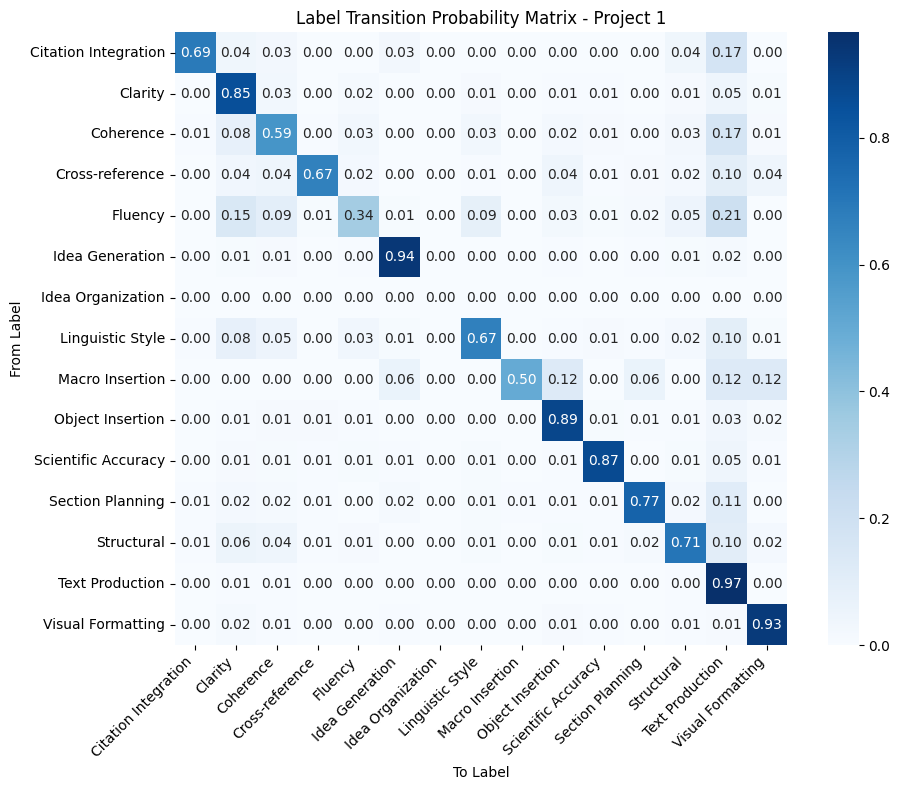

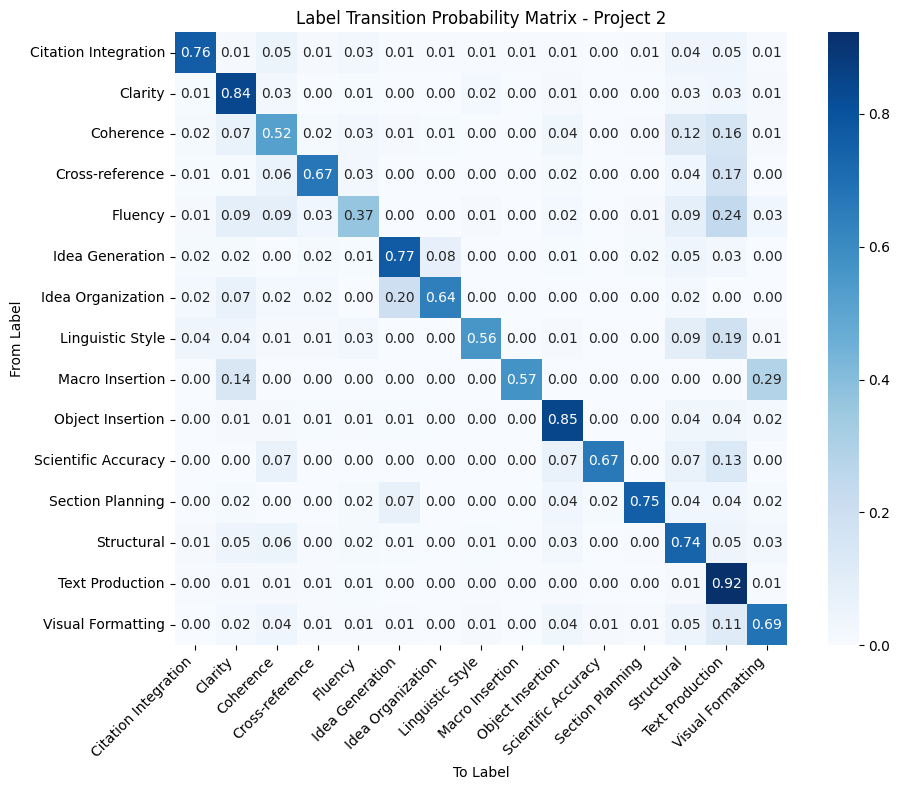

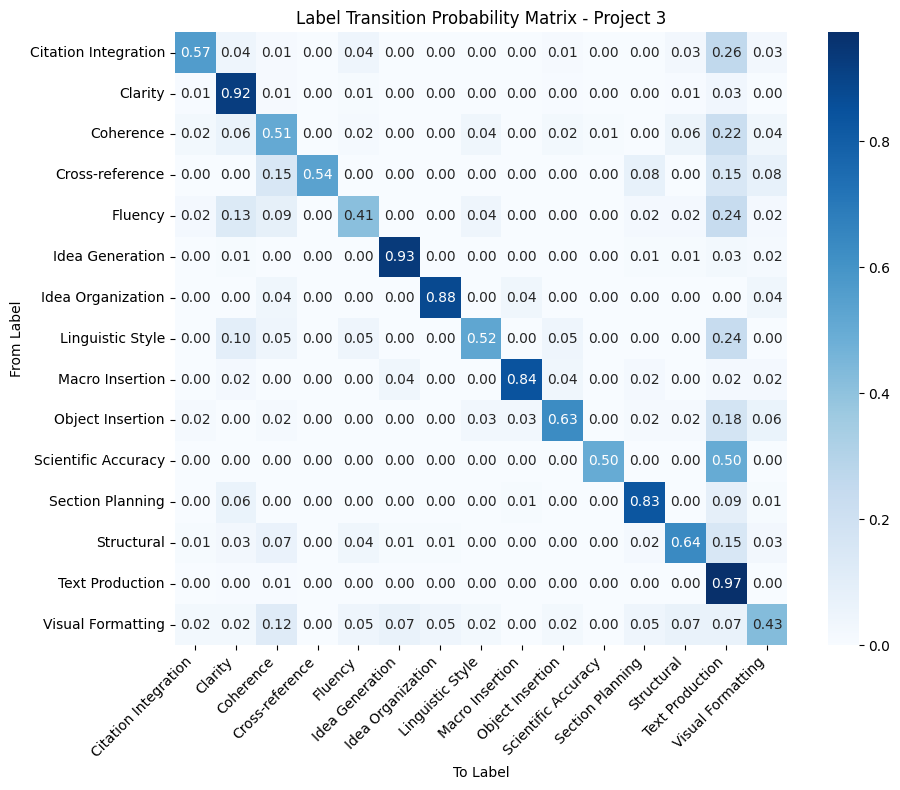

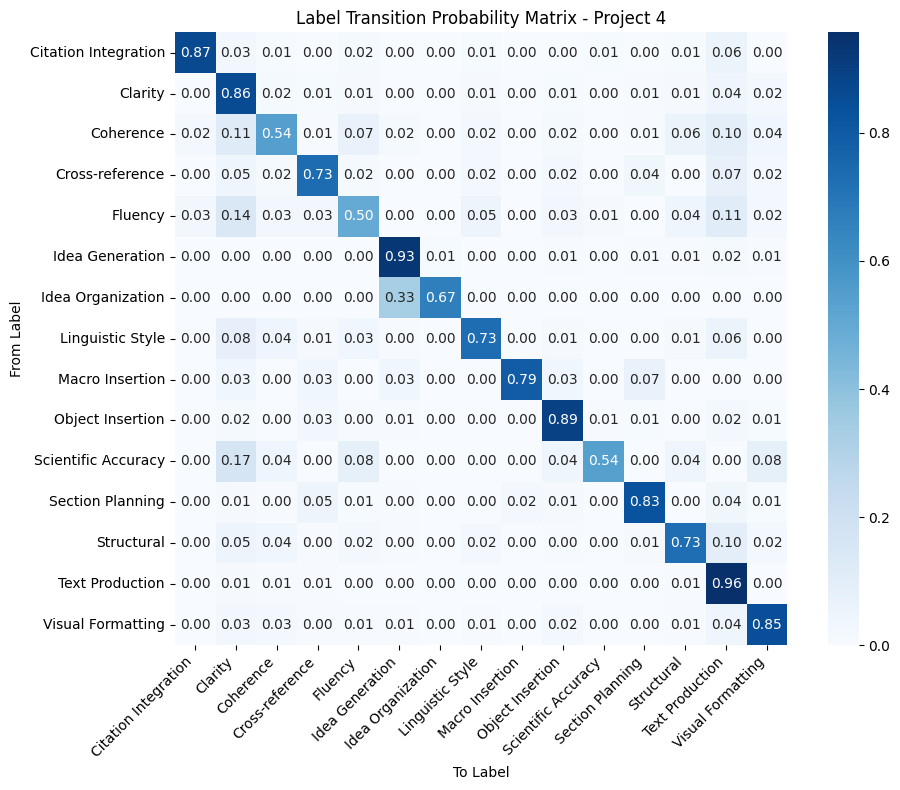

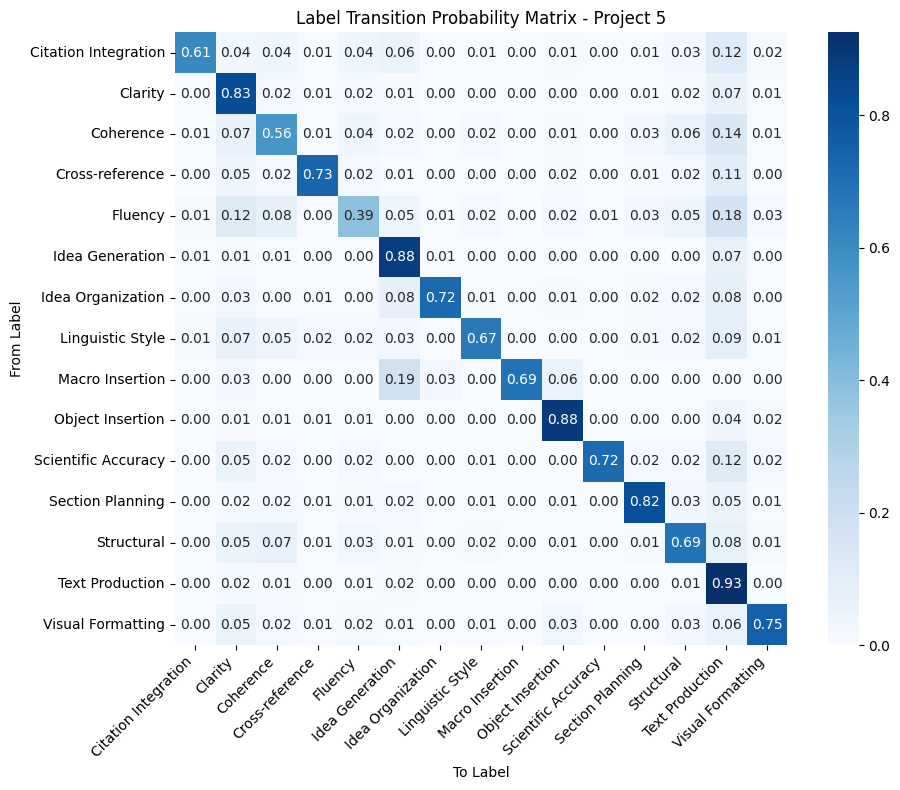

In [18]:
all_labels = set()
for matrix in transmit_matrices:
    all_labels.update(matrix.index)
    all_labels.update(matrix.columns)

sorted_labels = sorted(all_labels)

aligned_matrices = []
for matrix in transmit_matrices:
    aligned = matrix.reindex(index=sorted_labels, columns=sorted_labels).fillna(0)
    aligned_matrices.append(aligned)


for i, matrix in enumerate(aligned_matrices, start=1):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", square=True)
    plt.title(f"Label Transition Probability Matrix - Project {i}")
    plt.xlabel("To Label")
    plt.ylabel("From Label")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [19]:
total_counts = sum(
    matrix.mul(matrix.sum(axis=1), axis=0)
    for matrix in aligned_matrices
)

generalized_matrix = total_counts.div(total_counts.sum(axis=1), axis=0)

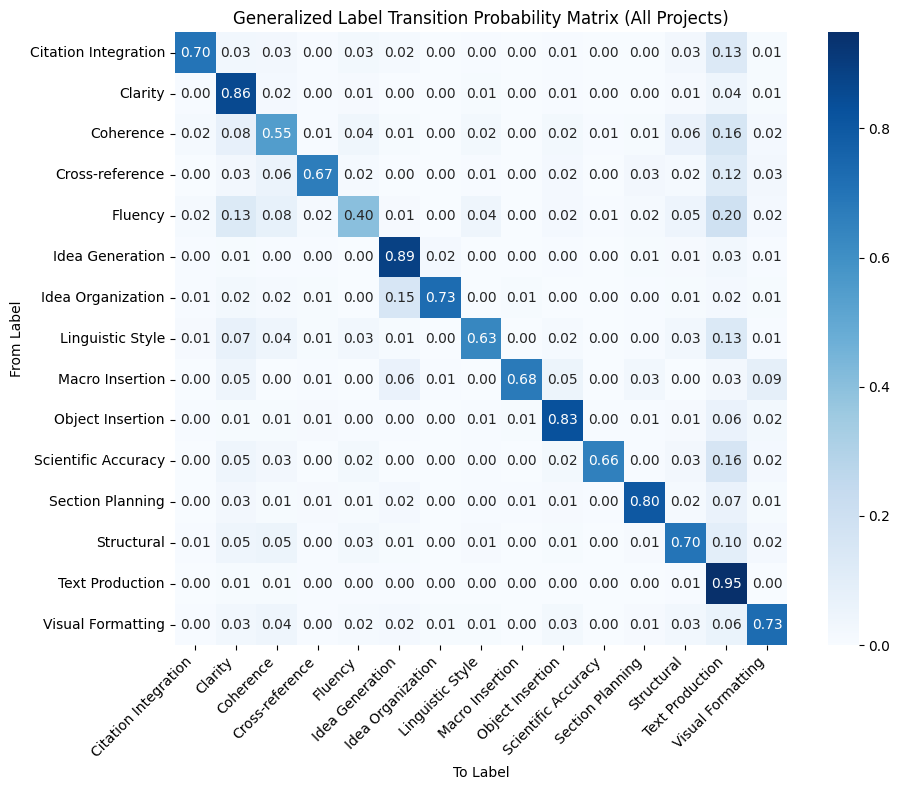

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(generalized_matrix, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.title("Generalized Label Transition Probability Matrix (All Projects)")
plt.xlabel("To Label")
plt.ylabel("From Label")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Model Behaviors

In [36]:
trans_matrices = []
for model_name, df in model_tables.items():
    trans_mat = build_label_transition_matrix(df['label'])
    trans_matrices.append({"name":model_name, "transition_matrix": trans_mat})

In [42]:
for item in trans_matrices:
    mat = item["transition_matrix"]
    aligned = mat.reindex(index=sorted_labels, columns=sorted_labels).fillna(0)
    item["transition_matrix"] = aligned

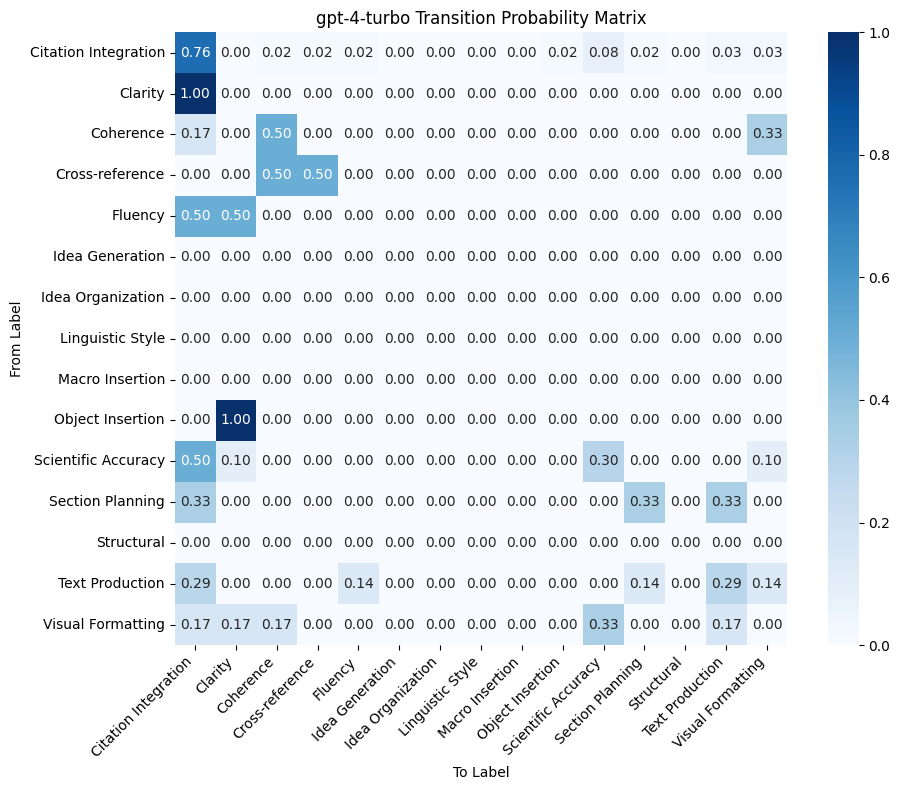

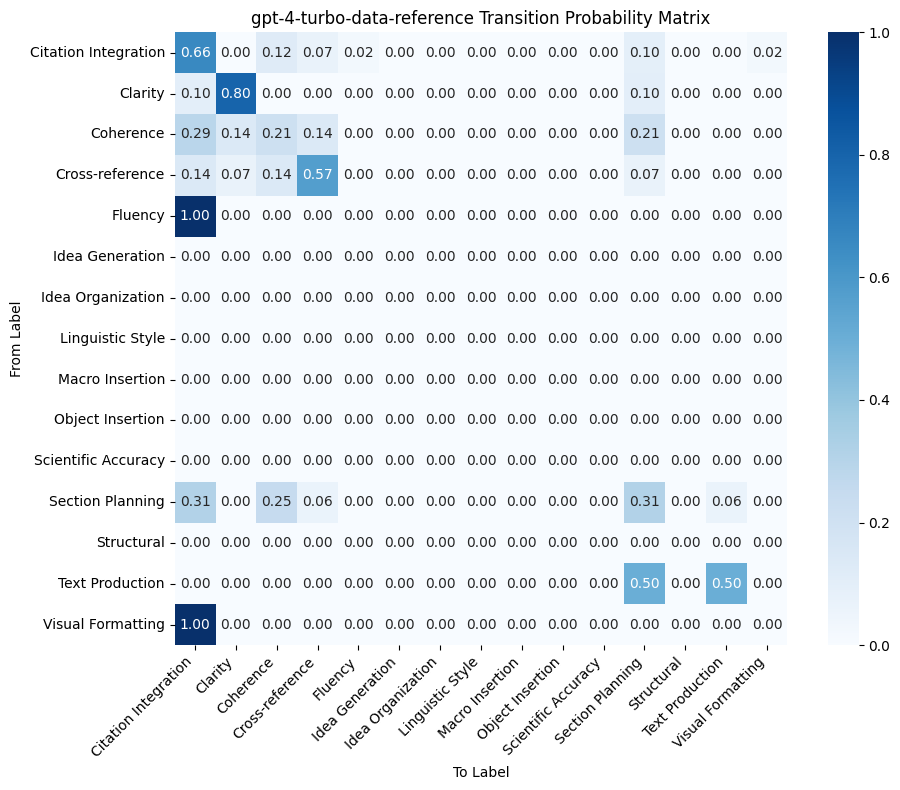

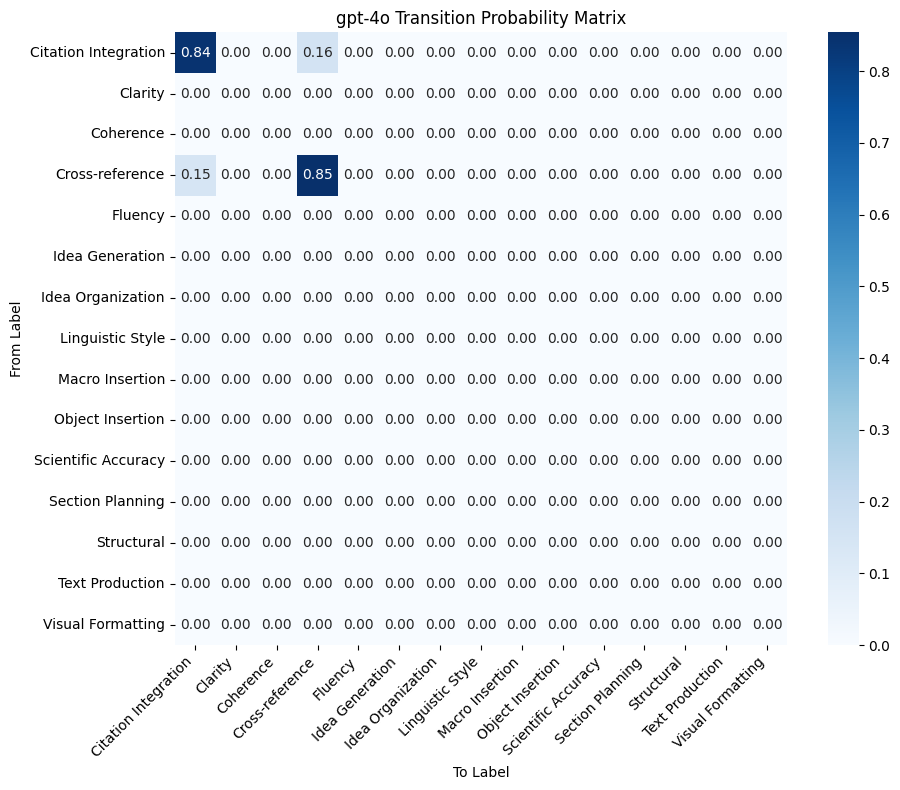

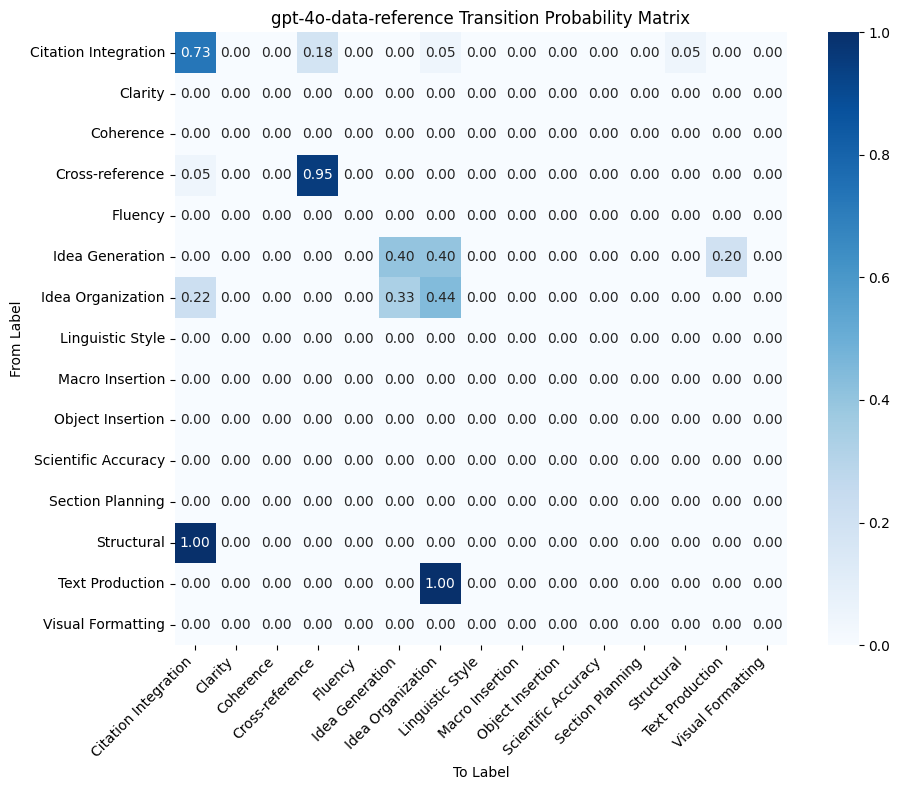

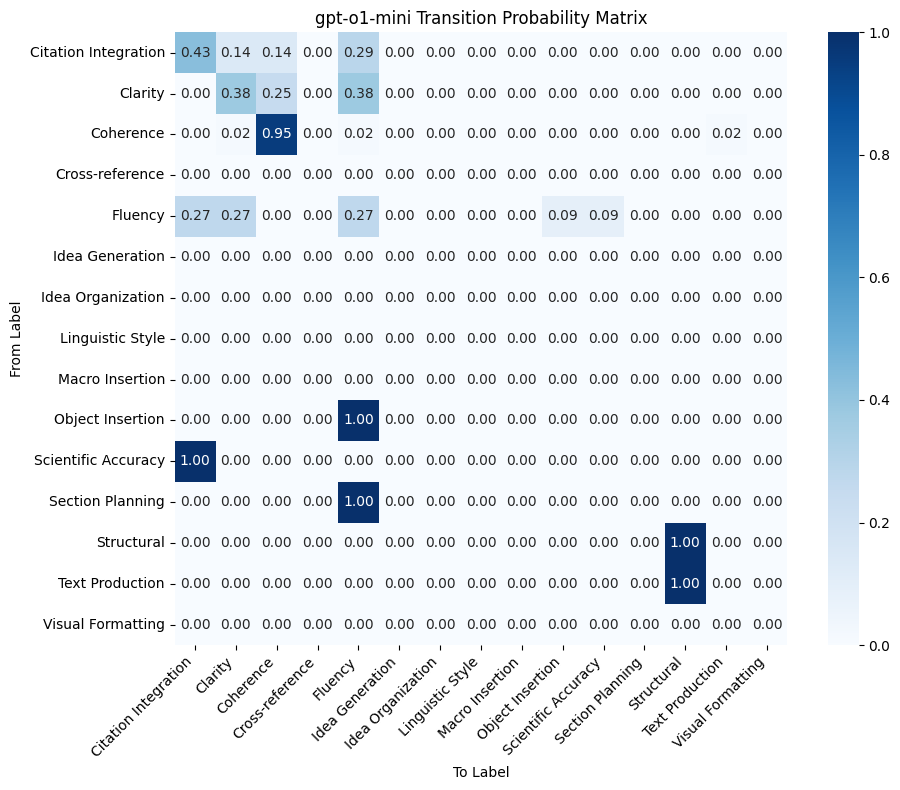

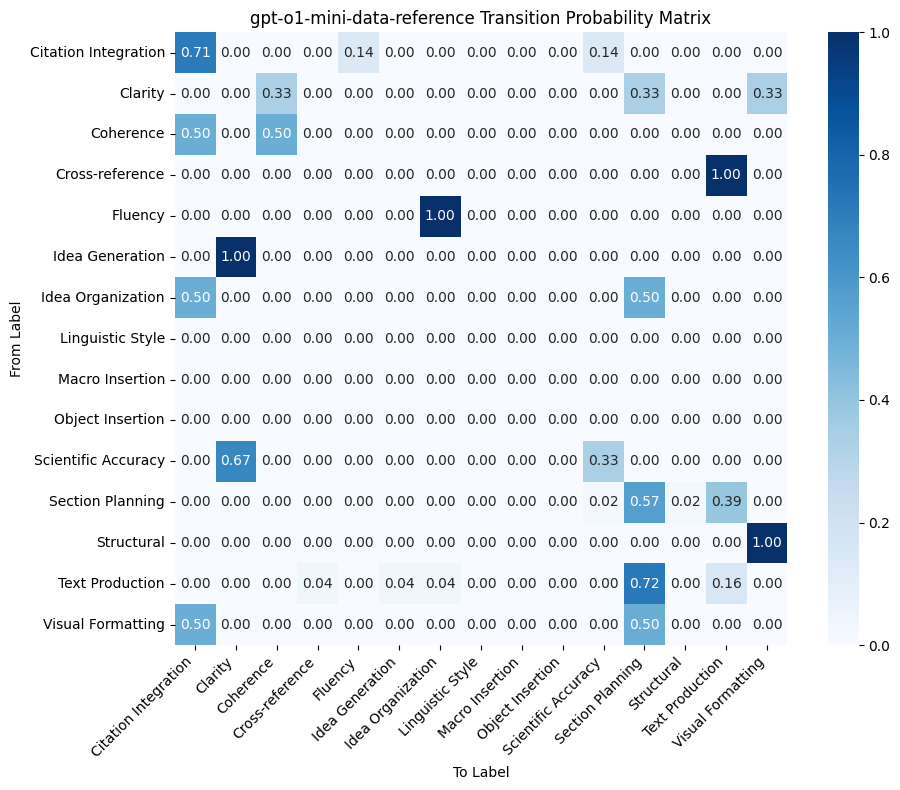

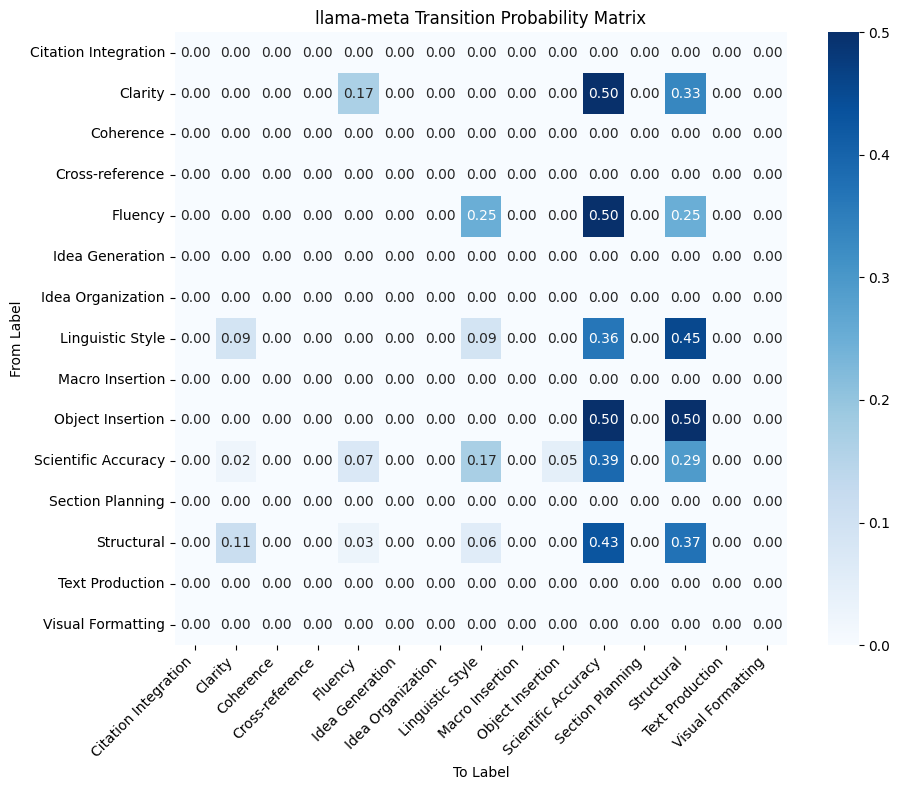

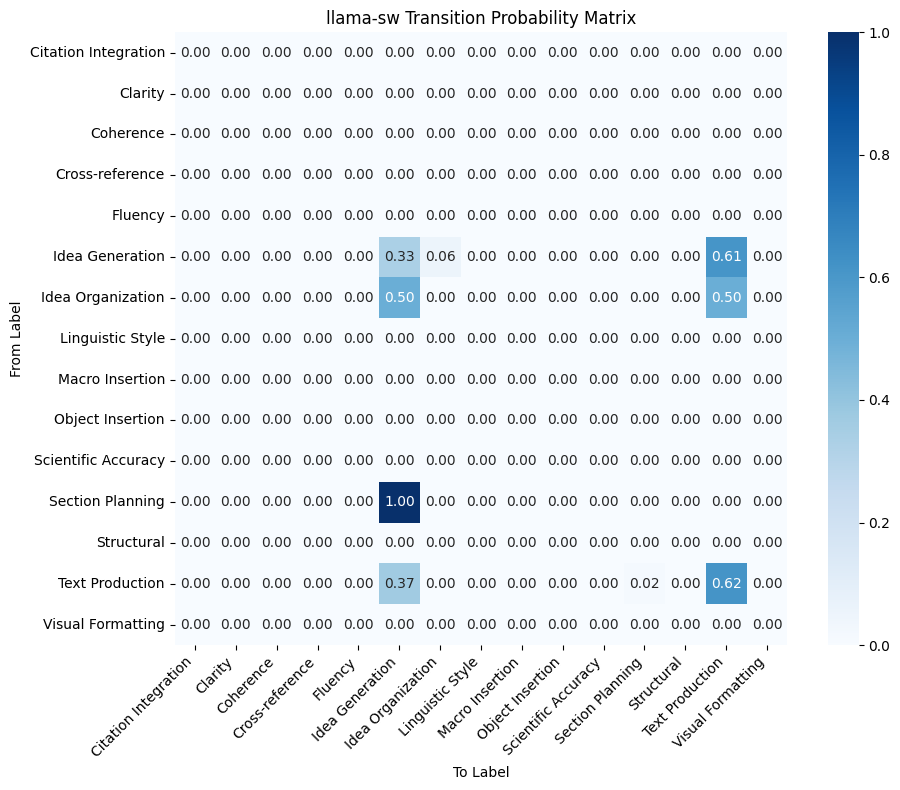

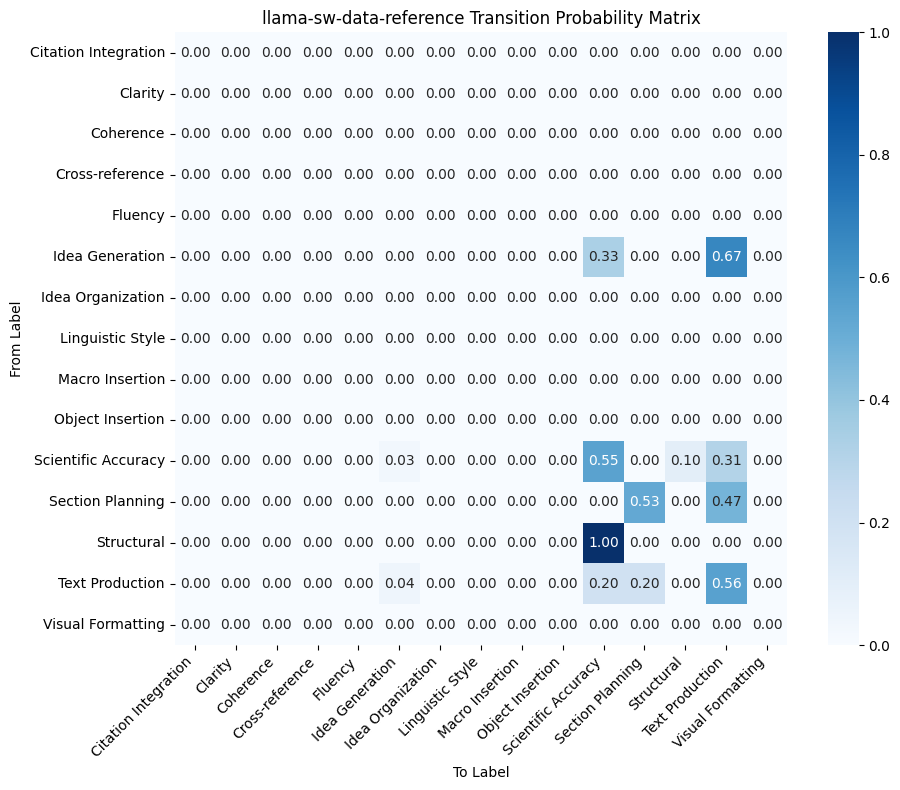

In [43]:
for item in trans_matrices:
    name = item["name"]
    mat = item["transition_matrix"]

    plt.figure(figsize=(10, 8))
    sns.heatmap(mat, annot=True, fmt=".2f", cmap="Blues", square=True)
    plt.title(f"{name} Transition Probability Matrix")
    plt.xlabel("To Label")
    plt.ylabel("From Label")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [1]:
def simulate_markov_chain(P_df, label_order, start_label=None, steps=20, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    labels = label_order
    P = P_df.loc[labels, labels].values

    if start_label is None:
        current_index = np.random.choice(len(labels))
    else:
        current_index = labels.index(start_label)

    sequence = [labels[current_index]]

    for _ in range(steps - 1):
        probs = P[current_index]
        next_index = np.random.choice(len(labels), p=probs)
        sequence.append(labels[next_index])
        current_index = next_index

    return sequence

In [22]:
project_tables[1].shape

(14217, 7)

## First-order Markov Simulation

In [37]:
sequence = simulate_markov_chain(
    P_df=generalized_matrix,
    label_order=sorted_labels,
    start_label="Text Production",
    steps=100,
    random_state=42
)

df = pd.DataFrame({'simulated_label': sequence})

df.to_csv('/kaggle/working/simulated_sequence.csv', index=False)

print("saved to /kaggle/working/simulated_sequence.csv")

saved to /kaggle/working/simulated_sequence.csv


In [26]:
label_series = pd.Series(sequence)
    
longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series, 3, 3, 0)
print(f"longest common subsequence: {longest_label}")
longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series, 3, 3, 1)
print(f"longest common subsequence: {longest_label}")
longest_label = most_frequent_contiguous_subsequence_with_constraint(label_series, 3, 3, 2)
print(f"longest common subsequence: {longest_label}")

longest common subsequence: (('Text Production', 'Text Production', 'Text Production'), 7694)
longest common subsequence: (('Clarity', 'Text Production', 'Text Production'), 92)
longest common subsequence: (('Text Production', 'Coherence', 'Structural'), 8)


# Sequential Comparison and Alignment

## Top-k Common Subsequence

In [32]:
def extract_fixed_length_subsequences(seq, n):
    return [tuple(seq[i:i+n]) for i in range(len(seq) - n + 1)]

def top_k_common_fixed_subsequences(seq1, seq2, n=3, k=5):
    subseq1 = extract_fixed_length_subsequences(seq1, n)
    subseq2 = extract_fixed_length_subsequences(seq2, n)

    count1 = Counter(subseq1)
    count2 = Counter(subseq2)

    common_keys = set(count1.keys()).intersection(count2.keys())

    common_subs = []
    for subseq in common_keys:
        freq1 = count1[subseq]
        freq2 = count2[subseq]
        total = freq1 + freq2
        common_subs.append((subseq, freq1, freq2, total))

    common_subs.sort(key=lambda x: x[3], reverse=True)

    return common_subs[:k]

In [33]:
top_seqs = top_k_common_subsequences(sequence, project_tables[1]['label'].tolist())
for s in top_seqs:
    print(list(s))

['Idea Generation', 'Object Insertion', 'Object Insertion', 'Object Insertion', 'Object Insertion']
['Text Production', 'Coherence', 'Coherence', 'Linguistic Style', 'Linguistic Style']
['Text Production', 'Text Production', 'Text Production', 'Text Production', 'Text Production']
['Text Production', 'Text Production', 'Coherence', 'Coherence', 'Coherence']
['Cross-reference', 'Text Production', 'Text Production', 'Text Production', 'Text Production']


## Alignment
### LCS Similarity

In [34]:
from difflib import SequenceMatcher

def lcs_similarity(seq1, seq2):
    matcher = SequenceMatcher(None, seq1, seq2)
    lcs_len = matcher.find_longest_match(0, len(seq1), 0, len(seq2)).size
    return lcs_len / min(len(seq1), len(seq2))

In [39]:
# data storage
def calculate_similarity_set(project_index, sim_func):
    sim_storage = []
    for model_name, df in model_tables.items():
            sim = sim_func(project_tables[project_index]['label'].tolist(), df['label'].tolist())
            sim_storage.append({"project":project_index, "model":model_name, "similarity":sim})
            print(f"Project {project_index} - an LCS Similarity Comparison between {model_name} and Human: {sim}")
    return sim_storage

In [40]:
lcs_sim_storage = calculate_similarity_set(1, lcs_similarity)

Project 1 - an LCS Similarity Comparison between gpt-4-turbo and Human: 0.1
Project 1 - an LCS Similarity Comparison between gpt-4-turbo-data-reference and Human: 0.08
Project 1 - an LCS Similarity Comparison between gpt-4o and Human: 0.11
Project 1 - an LCS Similarity Comparison between gpt-4o-data-reference and Human: 0.09
Project 1 - an LCS Similarity Comparison between gpt-o1-mini and Human: 0.18
Project 1 - an LCS Similarity Comparison between gpt-o1-mini-data-reference and Human: 0.07
Project 1 - an LCS Similarity Comparison between llama-meta and Human: 0.07
Project 1 - an LCS Similarity Comparison between llama-sw and Human: 0.1
Project 1 - an LCS Similarity Comparison between llama-sw-data-reference and Human: 0.14


In [38]:
lcs_similarity(project_tables[1]['label'].tolist(), sequence)

0.3

### Lavenshtein Distance Similarity

In [42]:
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.4 MB/s eta 0:00:0000:0100:01


In [44]:
import Levenshtein

def list_levenshtein_distance(seq1, seq2):
    s1 = ' '.join(seq1)
    s2 = ' '.join(seq2)
    dist = Levenshtein.distance(s1, s2)
    norm = dist / max(len(s1), len(s2))  
    return 1 - norm  

In [45]:
levenshtein_sim_storage = calculate_similarity_set(1, list_levenshtein_distance)

Project 1 - an LCS Similarity Comparison between gpt-4-turbo and Human: 0.008607260237878389
Project 1 - an LCS Similarity Comparison between gpt-4-turbo-data-reference and Human: 0.007581045537121689
Project 1 - an LCS Similarity Comparison between gpt-4o and Human: 0.008570279527941205
Project 1 - an LCS Similarity Comparison between gpt-4o-data-reference and Human: 0.007895381571587756
Project 1 - an LCS Similarity Comparison between gpt-o1-mini and Human: 0.004983150664034874
Project 1 - an LCS Similarity Comparison between gpt-o1-mini-data-reference and Human: 0.00766887472322253
Project 1 - an LCS Similarity Comparison between llama-meta and Human: 0.00698935417812685
Project 1 - an LCS Similarity Comparison between llama-sw and Human: 0.007405387164920119
Project 1 - an LCS Similarity Comparison between llama-sw-data-reference and Human: 0.007946230047751301


In [46]:
list_levenshtein_distance(project_tables[1]['label'].tolist(), sequence)

0.0063329465767418824